# Data Analytics Task

By Antonio Đurica - NBA Dataset

- Importing the libraries

In [8]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

- Loading the data

In [9]:
import pandas as pd

file_path = r'C:/Users/Antonio/Desktop/Knjiga1.xlsx'
data = pd.read_excel(file_path)


In [10]:
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 5148


,Rk,Player,Season,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,264,Damian Lillard,12-13,PG,22,POR,82,82,3167,553,...,0.844,42,215,257,531,74,19,243,172,1562
1,178,James Harden,15-16,SG,26,HOU,82,82,3125,710,...,0.860,63,438,501,612,139,51,374,229,2376
2,134,Kevin Durant,13-14,SF,25,OKC,81,81,3122,849,...,0.873,58,540,598,445,103,59,285,174,2593
3,120,Kevin Durant,12-13,SF,24,OKC,81,81,3119,731,...,0.905,46,594,640,374,116,105,280,143,2280
4,123,Monta Ellis,12-13,SG,27,MIL,82,82,3076,597,...,0.773,45,271,316,496,169,36,254,164,1577


- Getting the information on the data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      5148 non-null   int64  
 1   Player  5148 non-null   object 
 2   Season  5148 non-null   object 
 3   Pos     5148 non-null   object 
 4   Age     5148 non-null   int64  
 5   Tm      5148 non-null   object 
 6   G       5148 non-null   int64  
 7   GS      5148 non-null   int64  
 8   MP      5148 non-null   int64  
 9   FG      5148 non-null   int64  
 10  FGA     5148 non-null   int64  
 11  FG%     5121 non-null   float64
 12  3P      5148 non-null   int64  
 13  3PA     5148 non-null   int64  
 14  3P%     4696 non-null   float64
 15  2P      5148 non-null   int64  
 16  2PA     5148 non-null   int64  
 17  2P%     5087 non-null   float64
 18  eFG%    5121 non-null   float64
 19  FT      5148 non-null   int64  
 20  FTA     5148 non-null   int64  
 21  FT%     4900 non-null   float64
 22  

- Describing the data with simple statistics

In [12]:
data.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5121.000000,5148.000000,5148.000000,...,4900.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,259.471834,26.126457,49.189588,23.267288,1124.601399,182.680264,399.458430,0.440999,46.290404,129.470085,...,0.737074,48.360917,155.217754,203.578671,108.146659,35.827312,22.611111,63.421523,93.715035,492.261072
std,151.415103,4.226000,25.140750,27.522187,829.337916,166.007683,354.388259,0.105804,55.052440,144.826339,...,0.144828,55.816627,140.764006,189.189898,125.735958,31.925865,28.678780,59.665887,66.181737,455.650943
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129.000000,23.000000,29.000000,1.000000,345.000000,42.000000,99.000000,0.400000,2.000000,9.000000,...,0.667000,10.000000,41.000000,54.000000,20.000000,9.000000,4.000000,16.000000,33.000000,110.000000
50%,258.000000,25.000000,55.000000,9.000000,1058.500000,143.000000,316.000000,0.439000,24.000000,78.000000,...,0.761000,29.000000,125.000000,158.500000,67.000000,29.000000,13.000000,48.000000,92.000000,380.500000
75%,387.000000,29.000000,71.000000,44.000000,1802.000000,280.000000,614.000000,0.487000,74.000000,212.000000,...,0.829000,64.000000,223.250000,293.250000,147.000000,54.000000,30.000000,94.000000,143.000000,756.000000
max,605.000000,43.000000,83.000000,82.000000,3167.000000,857.000000,1941.000000,1.000000,402.000000,1028.000000,...,1.000000,440.000000,848.000000,1247.000000,907.000000,191.000000,269.000000,464.000000,301.000000,2818.000000


- Droping the unnecessary columns

In [13]:
data = data.drop(['Rk', 'GS', 'FG', 'FGA', '3PA', '2P', '2PA', '2P%', 'FT', 'FTA', 'ORB', 'DRB'], axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148 entries, 0 to 5147
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  5148 non-null   object 
 1   Season  5148 non-null   object 
 2   Pos     5148 non-null   object 
 3   Age     5148 non-null   int64  
 4   Tm      5148 non-null   object 
 5   G       5148 non-null   int64  
 6   MP      5148 non-null   int64  
 7   FG%     5121 non-null   float64
 8   3P      5148 non-null   int64  
 9   3P%     4696 non-null   float64
 10  eFG%    5121 non-null   float64
 11  FT%     4900 non-null   float64
 12  TRB     5148 non-null   int64  
 13  AST     5148 non-null   int64  
 14  STL     5148 non-null   int64  
 15  BLK     5148 non-null   int64  
 16  TOV     5148 non-null   int64  
 17  PF      5148 non-null   int64  
 18  PTS     5148 non-null   int64  
dtypes: float64(4), int64(11), object(4)
memory usage: 764.3+ KB


- Setting a limit of a 1000 minutes played as a minimum for a specific season to count

In [15]:
data = data[(data["MP"]>1000)]

In [16]:
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 2670


,Player,Season,Pos,Age,Tm,G,MP,FG%,3P,3P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,Damian Lillard,12-13,PG,22,POR,82,3167,0.429,185,0.368,0.501,0.844,257,531,74,19,243,172,1562
1,James Harden,15-16,SG,26,HOU,82,3125,0.439,236,0.359,0.512,0.860,501,612,139,51,374,229,2376
2,Kevin Durant,13-14,SF,25,OKC,81,3122,0.503,192,0.391,0.560,0.873,598,445,103,59,285,174,2593
3,Kevin Durant,12-13,SF,24,OKC,81,3119,0.510,139,0.416,0.559,0.905,640,374,116,105,280,143,2280
4,Monta Ellis,12-13,SG,27,MIL,82,3076,0.416,94,0.287,0.448,0.773,316,496,169,36,254,164,1577


- Finding out how many times does a single team appear in the data

In [17]:
print("Total number of seasons per team:\n", data["Tm"].value_counts(), "\n")

Total number of seasons per team:
 TOT    272
SAS     94
LAL     89
DEN     88
MIA     87
UTA     87
BRK     84
PHO     83
IND     82
CHI     82
BOS     82
GSW     81
MIL     81
TOR     80
DAL     80
ATL     79
LAC     79
NYK     79
WAS     77
MIN     77
MEM     77
OKC     77
SAC     76
POR     75
PHI     74
HOU     73
DET     72
ORL     72
CLE     70
NOP     68
CHO     66
CHA     18
NOH      9
Name: Tm, dtype: int64 



- Team "TOT" appears 272 times. "TOT" means that a player played for more then one team in the single season, while everything else is an abbreviation for a real franchise

- I am going to drop those seasons and then we will take only the top 5 teams to contiue our analysis

In [18]:
data = data[data['Tm'] != 'TOT']

In [19]:
print("Total number of seasons per team:\n", data["Tm"].value_counts(), "\n")

Total number of seasons per team:
 SAS    94
LAL    89
DEN    88
MIA    87
UTA    87
BRK    84
PHO    83
IND    82
CHI    82
BOS    82
GSW    81
MIL    81
DAL    80
TOR    80
ATL    79
LAC    79
NYK    79
WAS    77
MIN    77
OKC    77
MEM    77
SAC    76
POR    75
PHI    74
HOU    73
DET    72
ORL    72
CLE    70
NOP    68
CHO    66
CHA    18
NOH     9
Name: Tm, dtype: int64 



- I was just checking to see if the drop of the "TOT" worked, now last just kep the top 5...

In [20]:
values_to_keep = ['SAS', 'LAL', 'DEN', 'MIA', 'UTA']
column_to_filter = 'Tm'

data = data[data[column_to_filter].isin(values_to_keep)]

In [21]:
print("Total number of seasons per team:\n", data["Tm"].value_counts(), "\n")

Total number of seasons per team:
 SAS    94
LAL    89
DEN    88
MIA    87
UTA    87
Name: Tm, dtype: int64 



In [22]:
data.head()

,Player,Season,Pos,Age,Tm,G,MP,FG%,3P,3P%,eFG%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
11,Kobe Bryant,12-13,SG,34,LAL,78,3013,0.463,132,0.324,0.504,0.839,433,469,106,25,287,173,2133
37,LeBron James,13-14,PF,29,MIA,77,2902,0.567,116,0.379,0.610,0.750,533,488,121,26,270,126,2089
40,Gordon Hayward,15-16,SF,25,UTA,80,2893,0.433,143,0.349,0.493,0.824,397,296,95,27,202,183,1578
44,LeBron James,12-13,PF,28,MIA,76,2877,0.565,103,0.406,0.603,0.753,610,551,129,67,226,110,2036
82,Gordon Hayward,13-14,SF,23,UTA,77,2800,0.413,85,0.304,0.454,0.816,391,400,110,40,212,155,1248


- Now let's try to plot this values

Plot of the correlation of the data for the five teams with the most individual seasons played in the last 10 years


<Figure size 800x550 with 0 Axes>

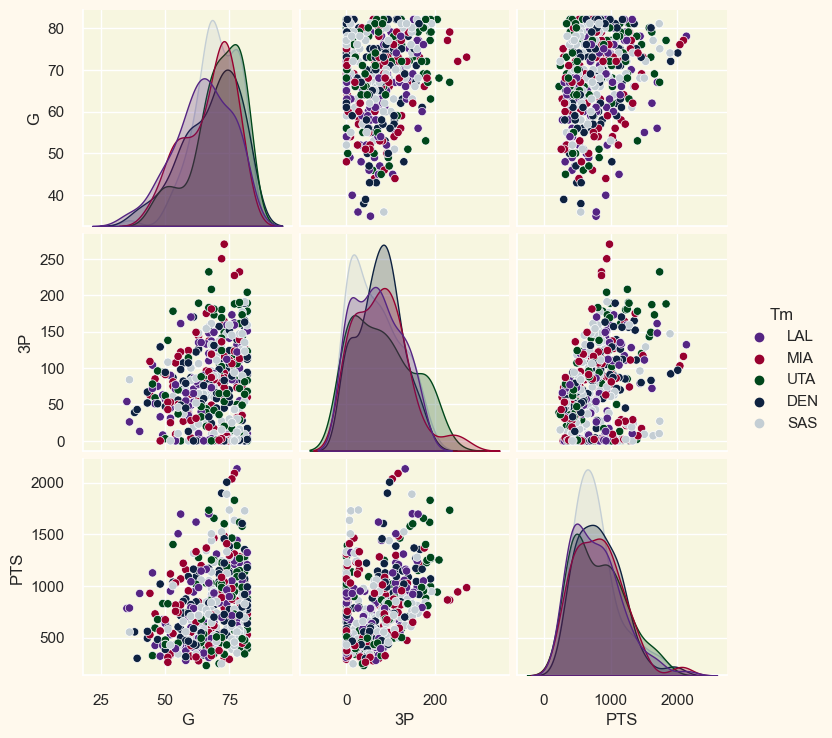

In [23]:
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#F7F6E0","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Tm", "G", "3P", "PTS"]
print("Plot of the correlation of the data for the five teams with the most individual seasons played in the last 10 years")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Tm",palette= (["#552583","#98002E","#00471B","#0E2240","#C4CED4"]))
plt.show()

- Now let's do a correlation map

<Axes: >

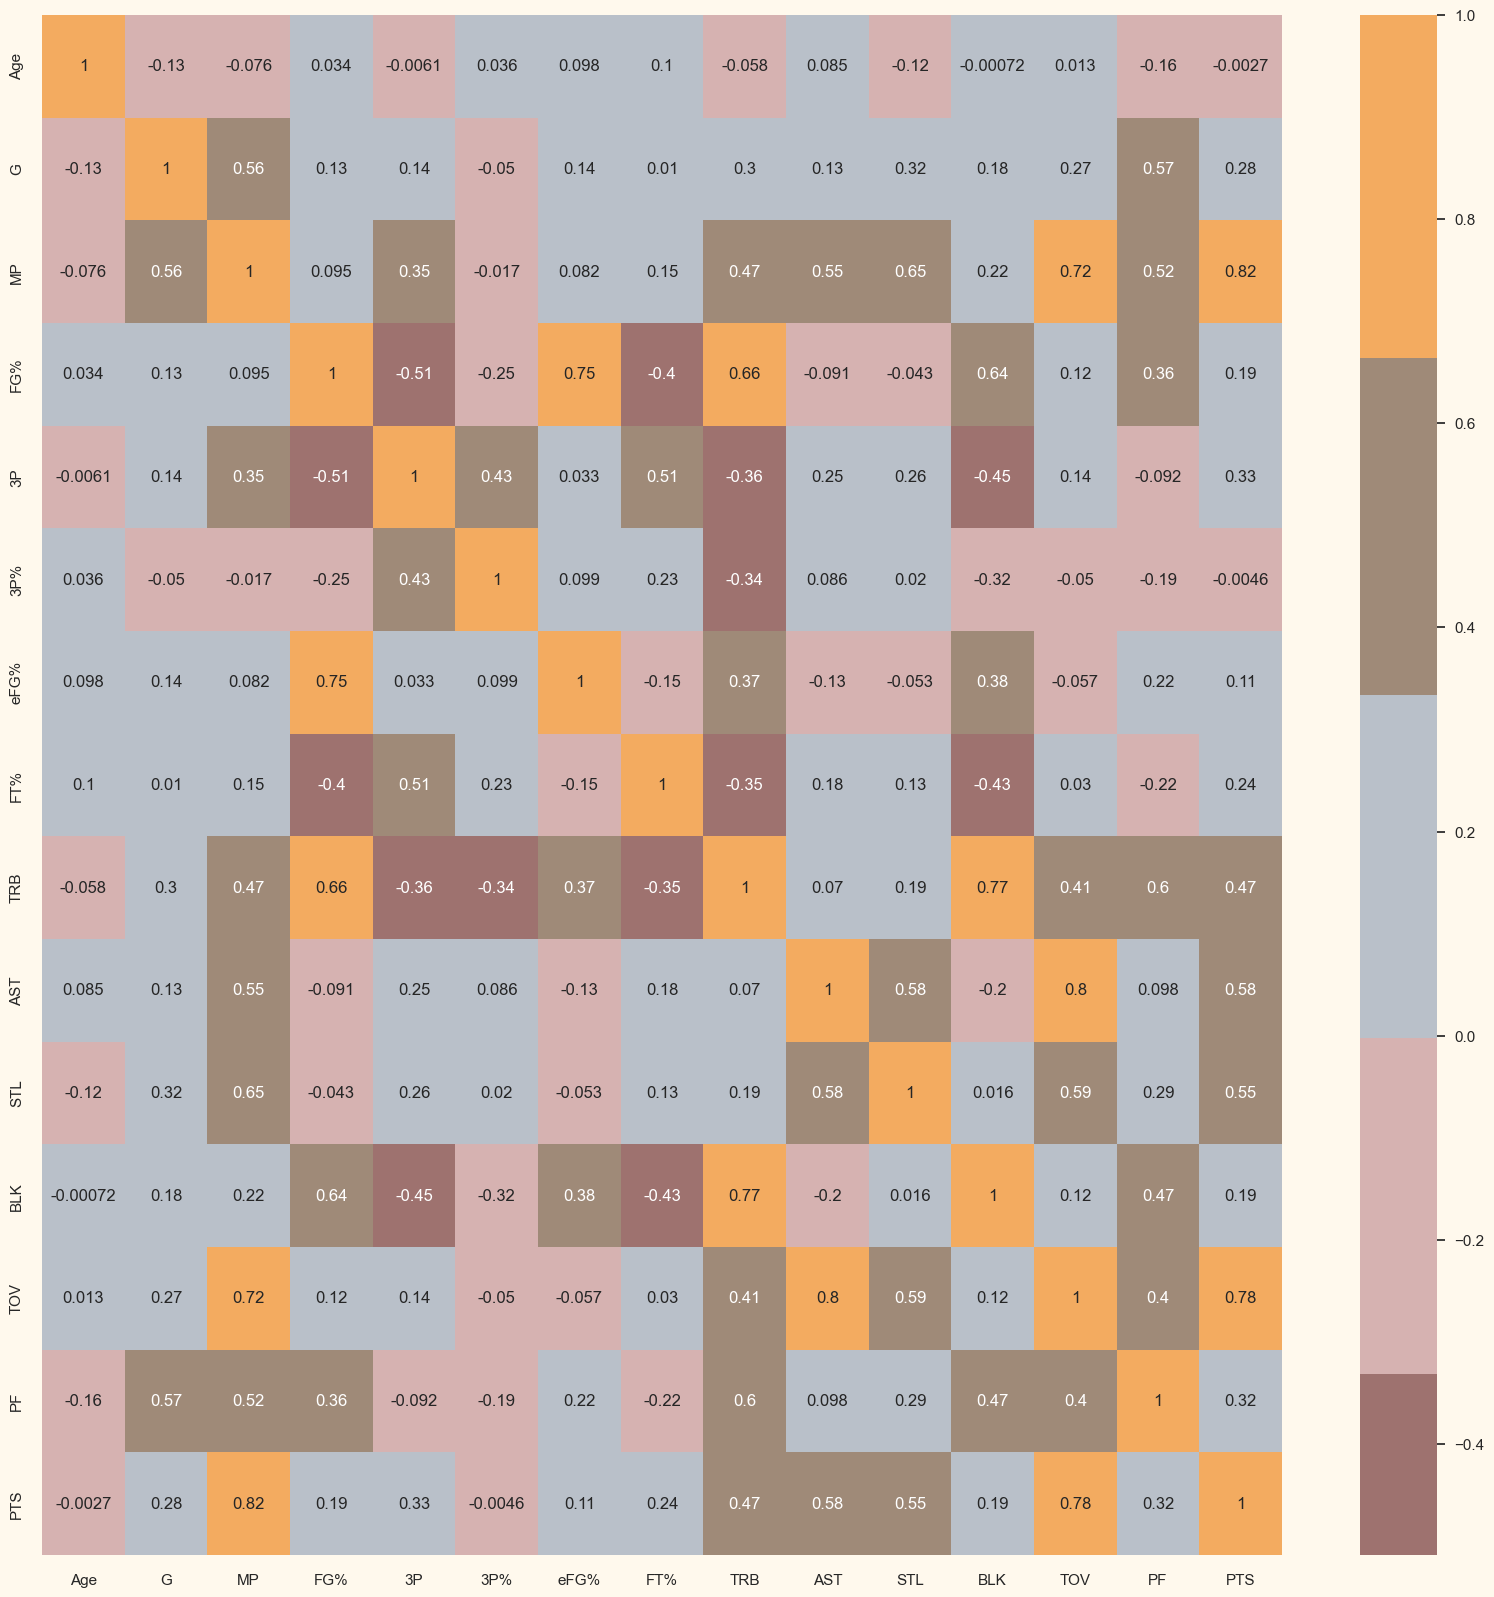

In [24]:
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

- I'm going to load the dataset again so I get all the teams again

In [25]:
import pandas as pd

file_path = r'C:/Users/Antonio/Desktop/Knjiga1.xlsx'
data = pd.read_excel(file_path)


In [26]:
data = data.drop(['Rk', 'GS', 'FG', 'FGA', '3PA', '2P', '2PA', '2P%', 'FT', 'FTA', 'ORB', 'DRB', 'eFG%'], axis=1)

In [27]:
data = data[(data["MP"]>1000)]

In [28]:
data.describe()

,Age,G,MP,FG%,3P,3P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
count,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2571.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000,2670.000000
mean,26.538951,68.390637,1811.340449,0.461538,76.923596,0.323441,0.764767,326.369663,180.714232,58.158052,35.719850,103.922846,144.440075,821.405993
std,4.158415,10.674509,506.689225,0.061564,60.026073,0.111170,0.095950,181.663111,135.558908,28.462956,33.094619,56.067428,44.987896,400.431470
min,19.000000,29.000000,1001.000000,0.305000,0.000000,0.000000,0.304000,47.000000,6.000000,7.000000,0.000000,10.000000,31.000000,159.000000
25%,23.000000,62.000000,1377.750000,0.421000,30.000000,0.308000,0.714250,195.000000,83.250000,38.000000,14.000000,62.250000,111.000000,520.000000
50%,26.000000,70.000000,1776.500000,0.449000,70.000000,0.350000,0.782000,282.000000,137.000000,52.000000,25.000000,91.000000,140.000000,738.000000
75%,29.000000,77.000000,2184.750000,0.487750,115.000000,0.381000,0.834000,408.000000,233.000000,72.000000,45.000000,130.000000,174.000000,1033.000000
max,42.000000,83.000000,3167.000000,0.763000,402.000000,1.000000,1.000000,1247.000000,907.000000,191.000000,269.000000,464.000000,301.000000,2818.000000


- the following are box-plot and a couple of scatter plots that shows the column "Points" alone and in corelation with 3P% and FG%

Text(0.5, 1.0, 'Box plot of total points scored in one season ')

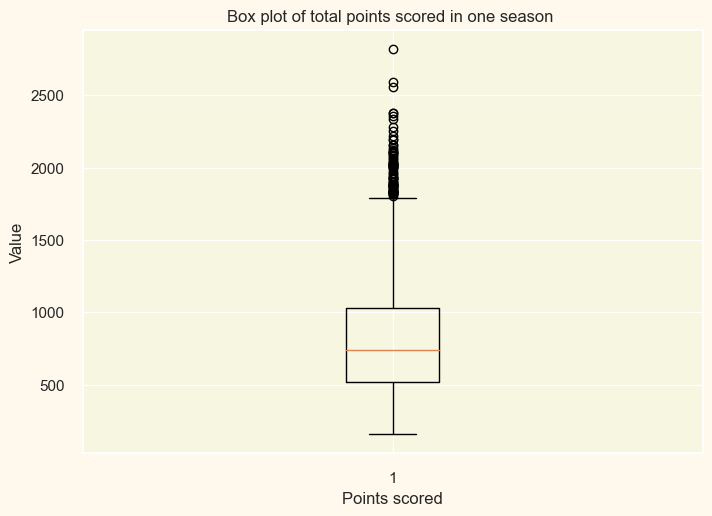

In [29]:
# Specify the column to plot
column_to_plot = 'PTS'

# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(data[column_to_plot])

# Set the axis labels and title
ax.set_xlabel('Points scored')
ax.set_ylabel('Value')
ax.set_title('Box plot of total points scored in one season '.format(column_to_plot))

Text(0.5, 1.0, 'Scatter plot of Points vs Field Goal percentage')

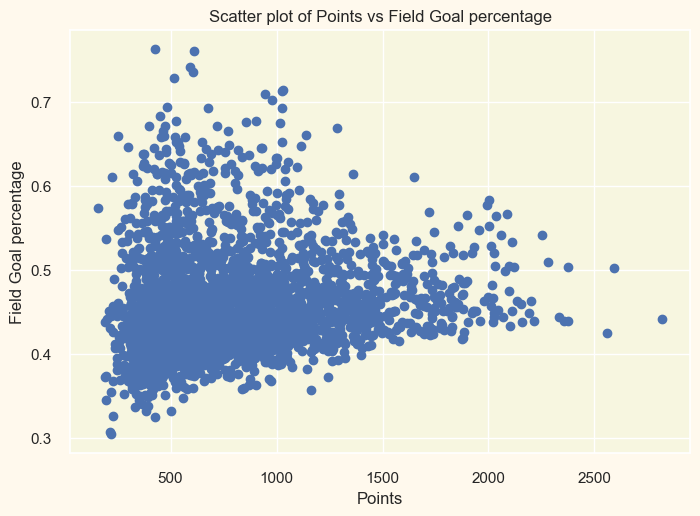

In [30]:
# Specify the columns to plot
x_column = 'PTS'
y_column = 'FG%'

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(data[x_column], data[y_column])

# Set the axis labels and title
ax.set_xlabel("Points")
ax.set_ylabel("Field Goal percentage")
ax.set_title('Scatter plot of Points vs Field Goal percentage'.format(x_column, y_column))

Text(0.5, 1.0, 'Scatter plot of Points vs 3 point shot percentage')

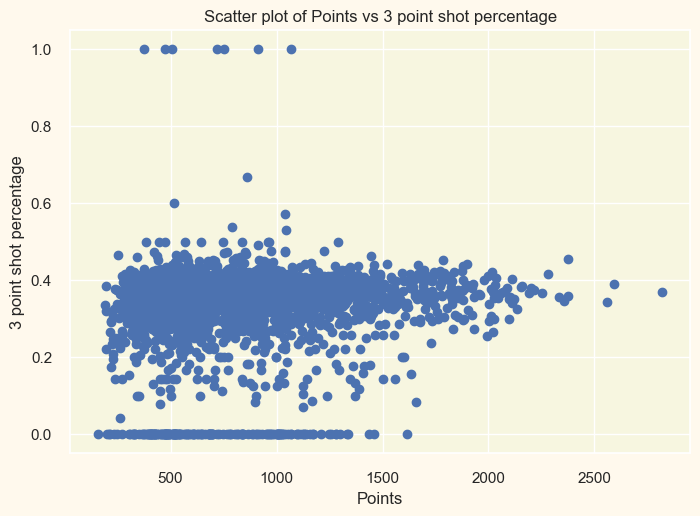

In [31]:
# Specify the columns to plot
x_column = 'PTS'
y_column = '3P%'

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(data[x_column], data[y_column])

# Set the axis labels and title
ax.set_xlabel("Points")
ax.set_ylabel("3 point shot percentage")
ax.set_title('Scatter plot of Points vs 3 point shot percentage'.format(x_column, y_column))

In [32]:
# Rank the DataFrame by a specific column
ranked_data = data.sort_values(by='PTS', ascending=False)

# Show the top 10 rows
top_10 = ranked_data.head(10)
print(top_10)

                Player Season Pos  Age   Tm   G    MP    FG%   3P    3P%  \
47        James Harden  18-19  PG   29  HOU  78  2867  0.442  378  0.368   
2         Kevin Durant  13-14  SF   25  OKC  81  3122  0.503  192  0.391   
79   Russell Westbrook  16-17  PG   28  OKC  81  2802  0.425  200  0.343   
1         James Harden  15-16  SG   26  HOU  82  3125  0.439  236  0.359   
126      Stephen Curry  15-16  PG   27  GSW  79  2700  0.504  402  0.454   
24        James Harden  16-17  PG   27  HOU  81  2947  0.440  262  0.347   
309       James Harden  19-20  SG   30  HOU  68  2483  0.444  299  0.355   
3         Kevin Durant  12-13  SF   24  OKC  81  3119  0.510  139  0.416   
8         LeBron James  17-18  PF   33  CLE  82  3026  0.542  149  0.367   
17        James Harden  14-15  SG   25  HOU  81  2981  0.440  208  0.375   

       FT%  TRB  AST  STL  BLK  TOV   PF   PTS  
47   0.879  518  586  158   58  387  244  2818  
2    0.873  598  445  103   59  285  174  2593  
79   0.845  864 

- Next I transformed all of the total value for a season to a Per-game values

In [33]:
data['MP/G'] = data['MP'] / data['G']
data['PTS/G'] = data['PTS'] / data['G']
data['3P/G'] = data['3P'] / data['G']
data['REB/G'] = data['TRB'] / data['G']
data['AST/G'] = data['AST'] / data['G']
data['STL/G'] = data['STL'] / data['G']
data['BLK/G'] = data['BLK'] / data['G']
data['TO/G'] = data['TOV'] / data['G']
data['PF/G'] = data['PF'] / data['G']

data['MP/G'] = data['MP/G'].round(1)
data['PTS/G'] = data['PTS/G'].round(2)
data['3P/G'] = data['3P/G'].round(1)
data['REB/G'] = data['REB/G'].round(2)
data['AST/G'] = data['AST/G'].round(2)
data['STL/G'] = data['STL/G'].round(2)
data['BLK/G'] = data['BLK/G'].round(2)
data['TO/G'] = data['TO/G'].round(2)
data['PF/G'] = data['PF/G'].round(1)

print(data)

                Player Season    Pos  Age   Tm   G    MP    FG%   3P    3P%  \
0       Damian Lillard  12-13     PG   22  POR  82  3167  0.429  185  0.368   
1         James Harden  15-16     SG   26  HOU  82  3125  0.439  236  0.359   
2         Kevin Durant  13-14     SF   25  OKC  81  3122  0.503  192  0.391   
3         Kevin Durant  12-13     SF   24  OKC  81  3119  0.510  139  0.416   
4          Monta Ellis  12-13     SG   27  MIL  82  3076  0.416   94  0.287   
...                ...    ...    ...  ...  ...  ..   ...    ...  ...    ...   
2665  Alfonzo McKinnie  18-19     SF   26  GSW  72  1003  0.487   42  0.356   
2666  Luc Mbah a Moute  13-14  PF-SF   27  TOT  64  1003  0.451    4  0.235   
2667   Wesley Matthews  21-22     SG   35  MIL  49  1002  0.395   53  0.338   
2668  Payton Pritchard  21-22     PG   24  BOS  71  1001  0.429  101  0.412   
2669     Rashad Vaughn  15-16     SG   19  MIL  70  1001  0.305   43  0.293   

      ...   PTS  MP/G  PTS/G  3P/G  REB/G  AST/G  S

...and droped the total values

In [34]:
data = data.drop(['MP', '3P', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], axis=1)

In [35]:
print(data)

                Player Season    Pos  Age   Tm   G    FG%    3P%    FT%  MP/G  \
0       Damian Lillard  12-13     PG   22  POR  82  0.429  0.368  0.844  38.6   
1         James Harden  15-16     SG   26  HOU  82  0.439  0.359  0.860  38.1   
2         Kevin Durant  13-14     SF   25  OKC  81  0.503  0.391  0.873  38.5   
3         Kevin Durant  12-13     SF   24  OKC  81  0.510  0.416  0.905  38.5   
4          Monta Ellis  12-13     SG   27  MIL  82  0.416  0.287  0.773  37.5   
...                ...    ...    ...  ...  ...  ..    ...    ...    ...   ...   
2665  Alfonzo McKinnie  18-19     SF   26  GSW  72  0.487  0.356  0.563  13.9   
2666  Luc Mbah a Moute  13-14  PF-SF   27  TOT  64  0.451  0.235  0.687  15.7   
2667   Wesley Matthews  21-22     SG   35  MIL  49  0.395  0.338  0.786  20.4   
2668  Payton Pritchard  21-22     PG   24  BOS  71  0.429  0.412  1.000  14.1   
2669     Rashad Vaughn  15-16     SG   19  MIL  70  0.305  0.293  0.800  14.3   

      PTS/G  3P/G  REB/G  A

...moved the order around a bit...

In [36]:
new_order = ['Pos', 'Player', 'Season', 'Age', 'Tm', 'G', 'MP/G', 'FG%', '3P/G', '3P%', 'FT%', 'PTS/G', 'REB/G', 'AST/G', 'STL/G', 'BLK/G', 'TO/G', 'PF/G']

# Reindex the DataFrame with the new column order
data = data.reindex(columns=new_order)

In [37]:
print(data)

        Pos            Player Season  Age   Tm   G  MP/G    FG%  3P/G    3P%  \
0        PG    Damian Lillard  12-13   22  POR  82  38.6  0.429   2.3  0.368   
1        SG      James Harden  15-16   26  HOU  82  38.1  0.439   2.9  0.359   
2        SF      Kevin Durant  13-14   25  OKC  81  38.5  0.503   2.4  0.391   
3        SF      Kevin Durant  12-13   24  OKC  81  38.5  0.510   1.7  0.416   
4        SG       Monta Ellis  12-13   27  MIL  82  37.5  0.416   1.1  0.287   
...     ...               ...    ...  ...  ...  ..   ...    ...   ...    ...   
2665     SF  Alfonzo McKinnie  18-19   26  GSW  72  13.9  0.487   0.6  0.356   
2666  PF-SF  Luc Mbah a Moute  13-14   27  TOT  64  15.7  0.451   0.1  0.235   
2667     SG   Wesley Matthews  21-22   35  MIL  49  20.4  0.395   1.1  0.338   
2668     PG  Payton Pritchard  21-22   24  BOS  71  14.1  0.429   1.4  0.412   
2669     SG     Rashad Vaughn  15-16   19  MIL  70  14.3  0.305   0.6  0.293   

        FT%  PTS/G  REB/G  AST/G  STL/G

In [38]:
data = data.drop(['Pos'], axis=1)

In [39]:
print(data)

                Player Season  Age   Tm   G  MP/G    FG%  3P/G    3P%    FT%  \
0       Damian Lillard  12-13   22  POR  82  38.6  0.429   2.3  0.368  0.844   
1         James Harden  15-16   26  HOU  82  38.1  0.439   2.9  0.359  0.860   
2         Kevin Durant  13-14   25  OKC  81  38.5  0.503   2.4  0.391  0.873   
3         Kevin Durant  12-13   24  OKC  81  38.5  0.510   1.7  0.416  0.905   
4          Monta Ellis  12-13   27  MIL  82  37.5  0.416   1.1  0.287  0.773   
...                ...    ...  ...  ...  ..   ...    ...   ...    ...    ...   
2665  Alfonzo McKinnie  18-19   26  GSW  72  13.9  0.487   0.6  0.356  0.563   
2666  Luc Mbah a Moute  13-14   27  TOT  64  15.7  0.451   0.1  0.235  0.687   
2667   Wesley Matthews  21-22   35  MIL  49  20.4  0.395   1.1  0.338  0.786   
2668  Payton Pritchard  21-22   24  BOS  71  14.1  0.429   1.4  0.412  1.000   
2669     Rashad Vaughn  15-16   19  MIL  70  14.3  0.305   0.6  0.293  0.800   

      PTS/G  REB/G  AST/G  STL/G  BLK/G

In [40]:
data.to_csv('NBA dataset - cleaned.csv', index=False)

In [41]:
# Rank the DataFrame by a specific column
ranked_data = data.sort_values(by='PTS/G', ascending=False)

# Show the top 10 rows
top_10 = ranked_data.head(10)
print(top_10)

                Player Season  Age   Tm   G  MP/G    FG%  3P/G    3P%    FT%  \
47        James Harden  18-19   29  HOU  78  36.8  0.442   4.8  0.368  0.879   
309       James Harden  19-20   30  HOU  68  36.5  0.444   4.4  0.355  0.865   
2         Kevin Durant  13-14   25  OKC  81  38.5  0.503   2.4  0.391  0.873   
714      Stephen Curry  20-21   32  GSW  63  34.2  0.482   5.3  0.421  0.916   
79   Russell Westbrook  16-17   28  OKC  81  34.6  0.425   2.5  0.343  0.845   
722       Bradley Beal  20-21   27  WAS  60  35.8  0.485   2.2  0.349  0.889   
517        Joel Embiid  21-22   27  PHI  68  33.8  0.499   1.4  0.371  0.814   
875       Bradley Beal  19-20   26  WAS  57  36.0  0.455   3.0  0.353  0.842   
242       James Harden  17-18   28  HOU  72  35.4  0.449   3.7  0.367  0.858   
824       LeBron James  21-22   37  LAL  56  37.2  0.524   2.9  0.359  0.756   

     PTS/G  REB/G  AST/G  STL/G  BLK/G  TO/G  PF/G  
47   36.13   6.64   7.51   2.03   0.74  4.96   3.1  
309  34.34   

...and then showed just the Top 10 scorers of the past 10 seasons along with the season and the team they played for

In [42]:
Player_Points = data.loc[:, ['Player', 'Season', 'Tm', 'PTS/G']]

# Rank the DataFrame by a specific column
ranked_Player_Points = Player_Points.sort_values(by='PTS/G', ascending=False)

# Show the top 10 rows
top_10 = ranked_Player_Points.head(10)
print(top_10)

                Player Season   Tm  PTS/G
47        James Harden  18-19  HOU  36.13
309       James Harden  19-20  HOU  34.34
2         Kevin Durant  13-14  OKC  32.01
714      Stephen Curry  20-21  GSW  31.98
79   Russell Westbrook  16-17  OKC  31.58
722       Bradley Beal  20-21  WAS  31.30
517        Joel Embiid  21-22  PHI  30.57
875       Bradley Beal  19-20  WAS  30.54
242       James Harden  17-18  HOU  30.43
824       LeBron James  21-22  LAL  30.27
